In [1]:
import sys
import os
from PIL import Image
import time
import numpy as np

src = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.insert(0, src)

image_path = '../targets/picasso.png'

from evolution import evolve


[04:00:42] Initial population initialization ...
[04:00:44] Population initialized.
Generation 1/15000. Best fitness: 7914.353. Mutation rate: 0.200, time [04:00:44]


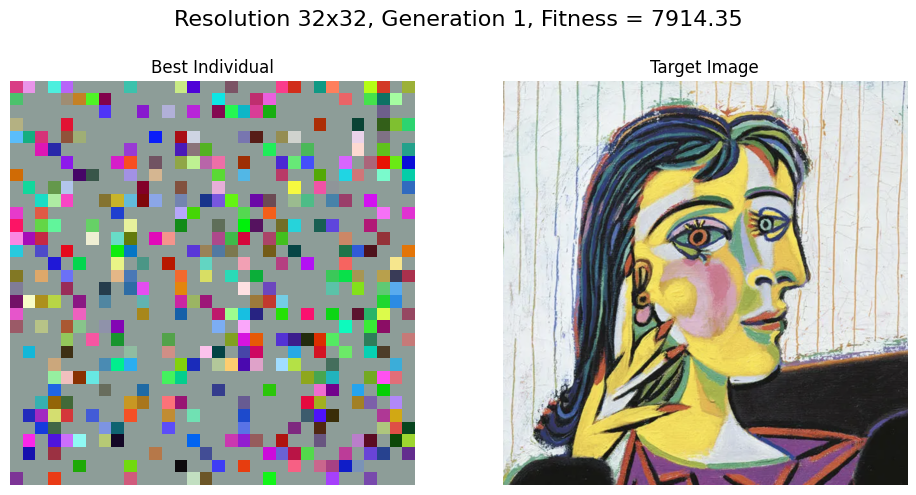

Generation 2/15000. Best fitness: 7066.924. Mutation rate: 0.200, time [04:00:45]


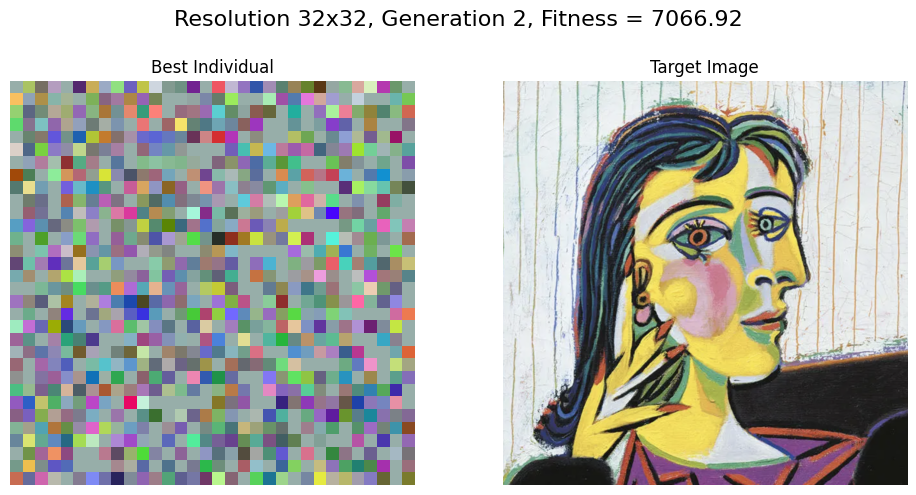

Generation 5/15000. Best fitness: 6106.453. Mutation rate: 0.200, time [04:00:46]


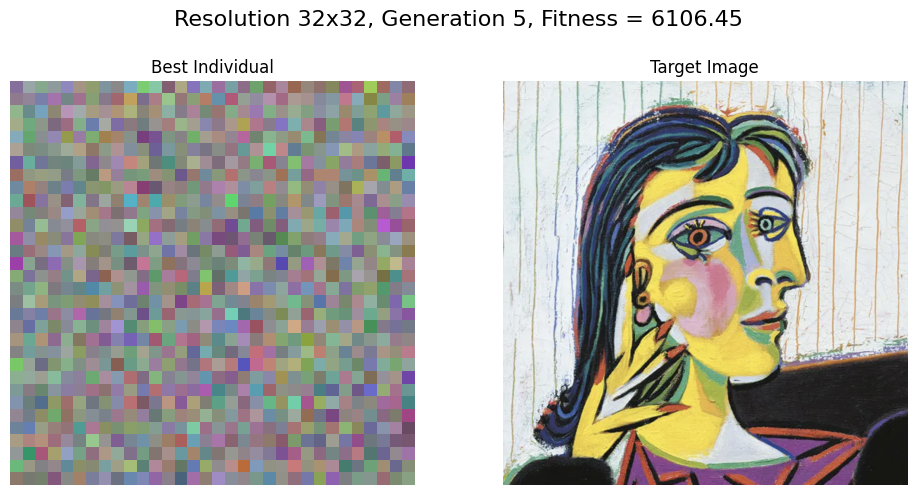

Generation 10/15000. Best fitness: 5967.509. Mutation rate: 0.191, time [04:00:47]


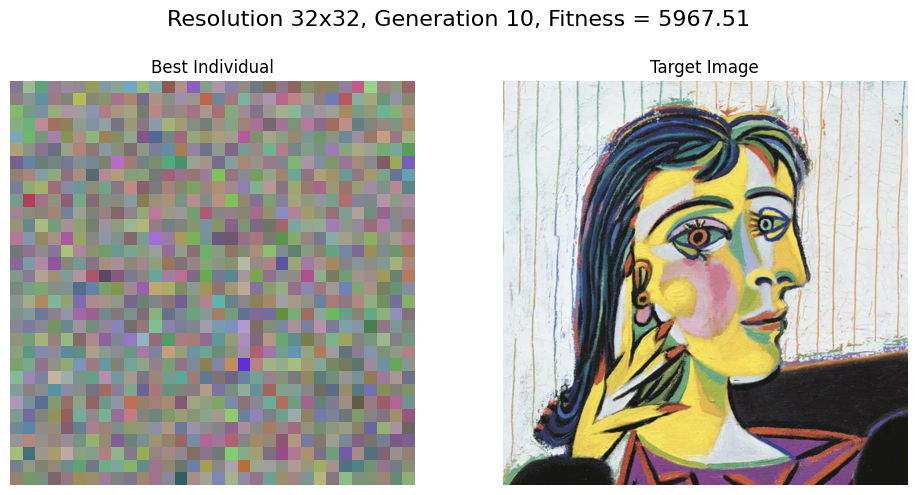

Generation 100/15000. Best fitness: 5109.613. Mutation rate: 0.122, time [04:00:50]


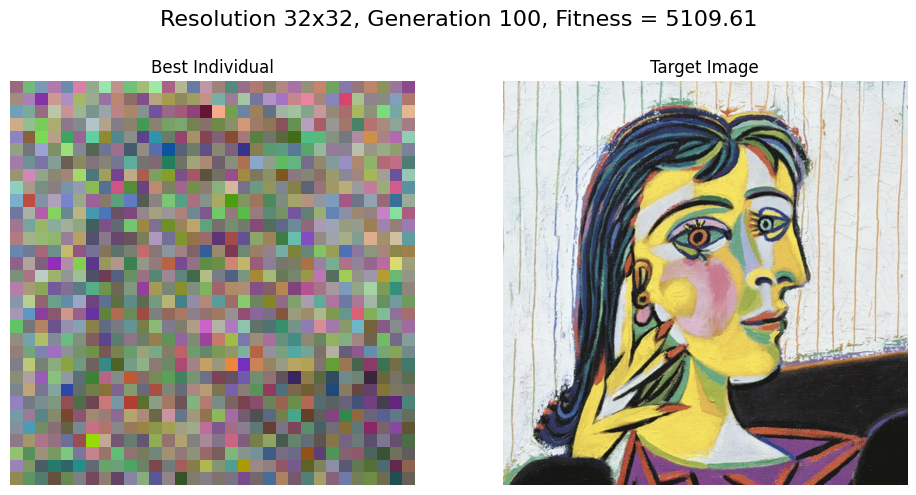

Generation 1000/15000. Best fitness: 797.555. Mutation rate: 0.001, time [04:01:12]


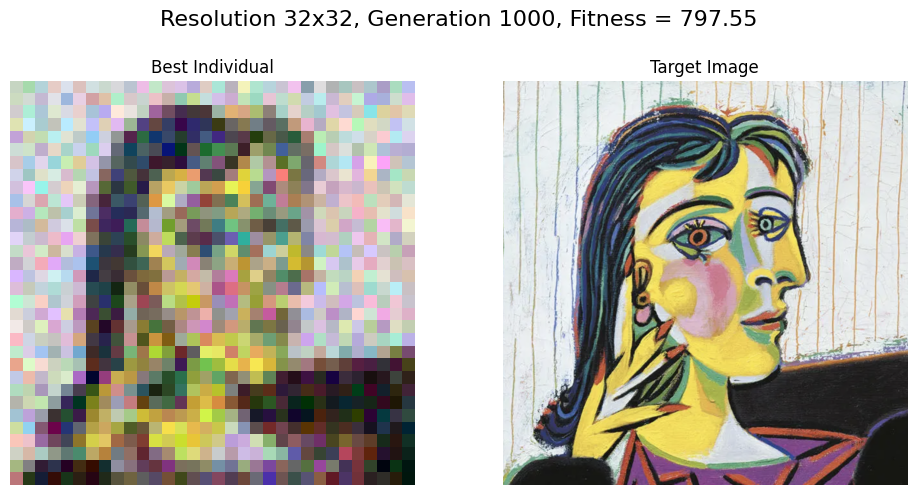

Generation 2000/15000. Best fitness: 202.766. Mutation rate: 0.001, time [04:01:37]


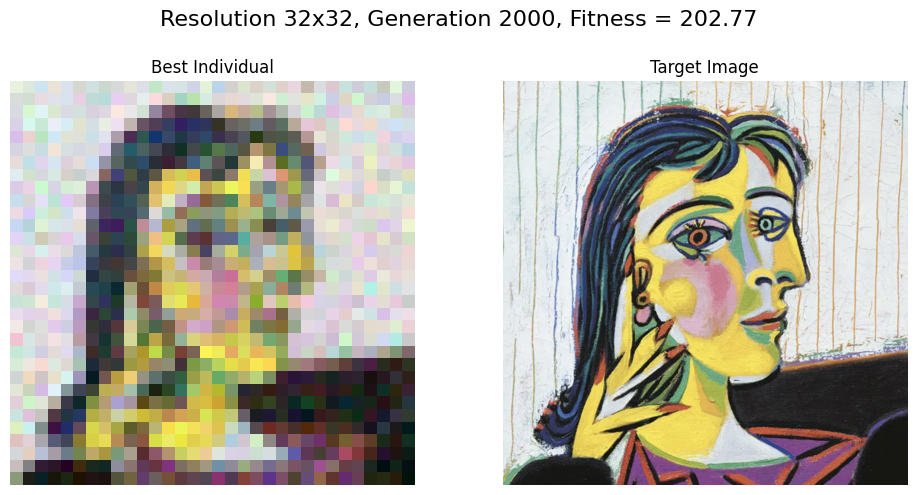

Generation 3000/15000. Best fitness: 58.491. Mutation rate: 0.001, time [04:02:01]


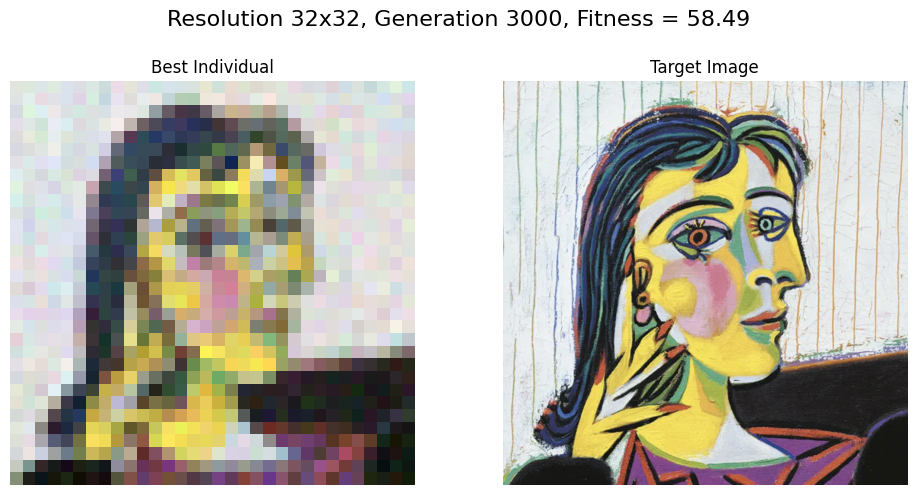

Generation 4000/15000. Best fitness: 28.207. Mutation rate: 0.001, time [04:02:26]


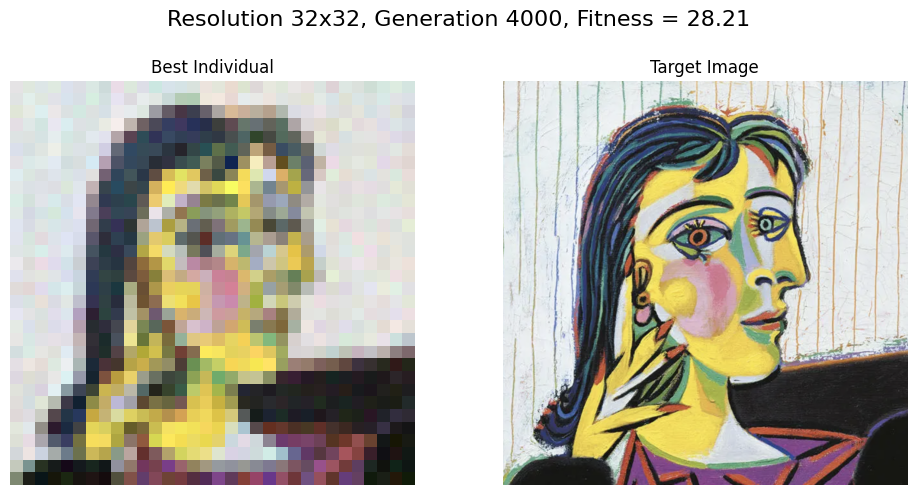

Generation 5000/15000. Best fitness: 17.484. Mutation rate: 0.001, time [04:02:51]


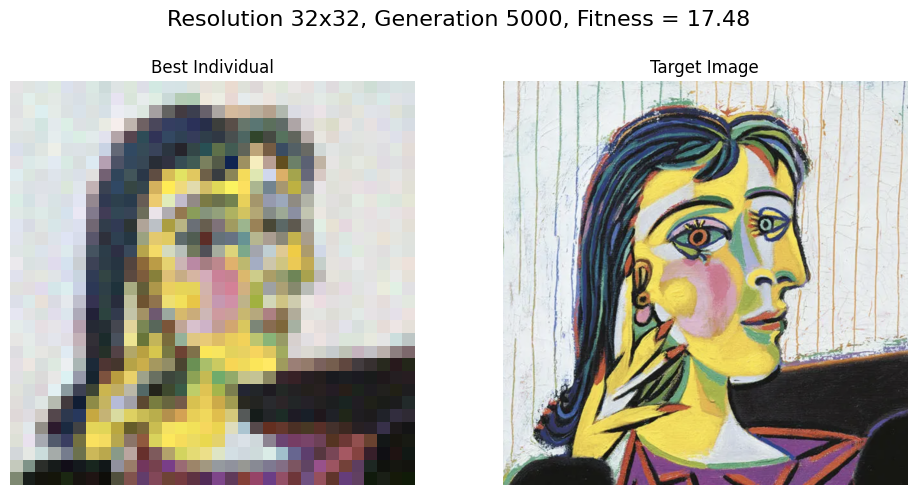

Stagnation detected at generation 5683. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 5878. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 5999. Actual mutation rate: 0.001. Increasing mutation rate.
Generation 6000/15000. Best fitness: 12.584. Mutation rate: 0.001, time [04:03:17]


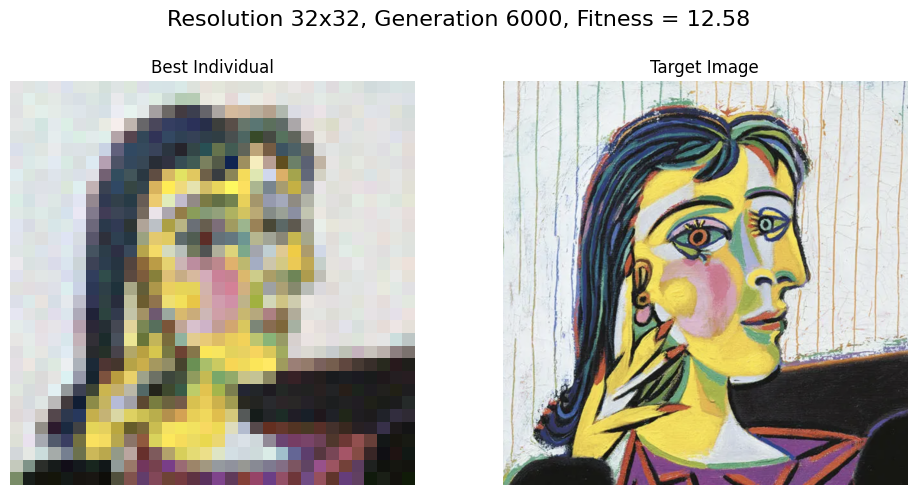

Stagnation detected at generation 6103. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 6278. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 6582. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 6679. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 6689. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 6958. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 6992. Actual mutation rate: 0.001. Increasing mutation rate.
Generation 7000/15000. Best fitness: 9.850. Mutation rate: 0.001, time [04:03:44]


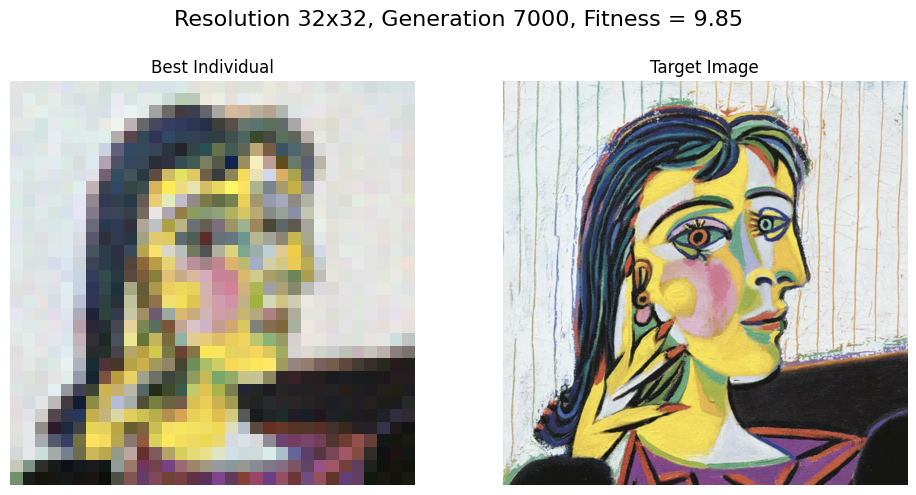

Stagnation detected at generation 7129. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7157. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7206. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7216. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7256. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7366. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7384. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7459. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7485. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7511. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 7527. Actual mut

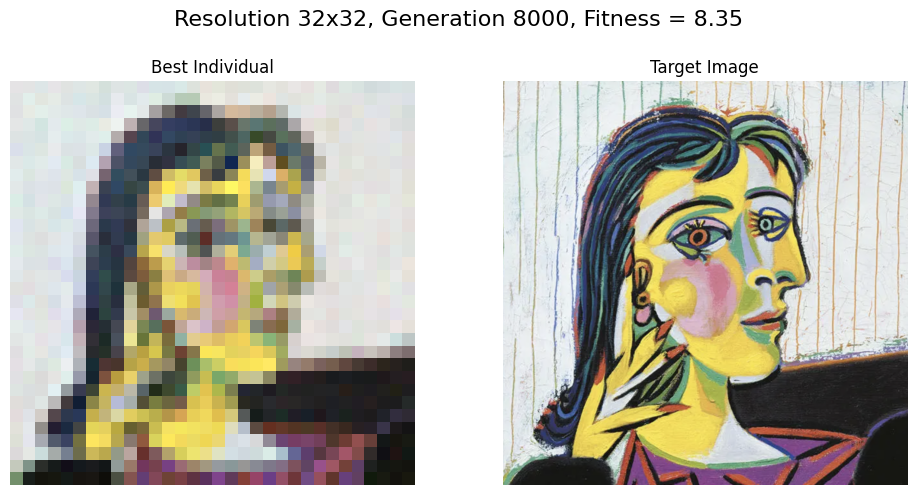

Stagnation detected at generation 8009. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8041. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8060. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8146. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8218. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8249. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8259. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8286. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8319. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8329. Actual mutation rate: 0.001. Increasing mutation rate.
Stagnation detected at generation 8352. Actual mut

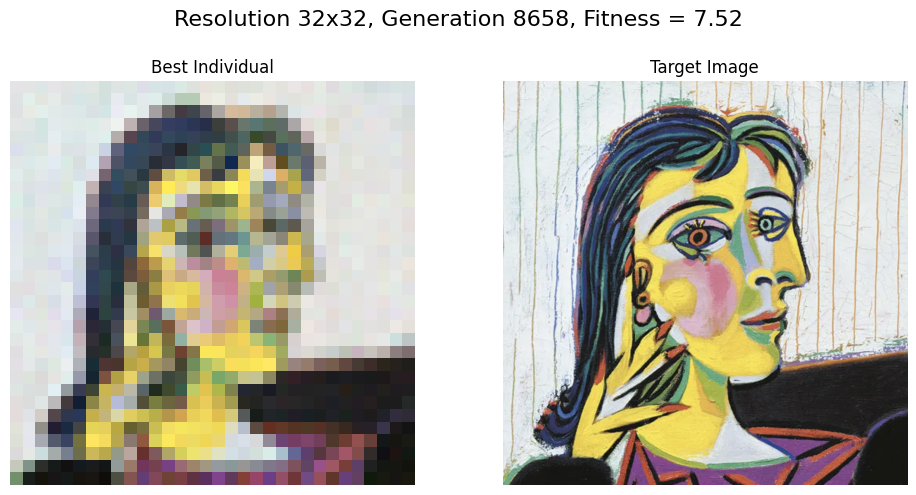

Data exported successfully.


In [2]:
start_time = time.time()
result_32, fitness_evolution_32 = evolve(image_path, 
           pop_size = 150, 
           palette_size = 256, 
           generations = 15000, 
           mutation_rate = 0.2,
           max_mutation_rate = 0.2,
           tournament_size = 8,
           replacement = 20,
           min_mutation_rate = 0.0005,
           stagnation_limit = 10,
           n = 32,
           fit = 'mse')
end_time = time.time()

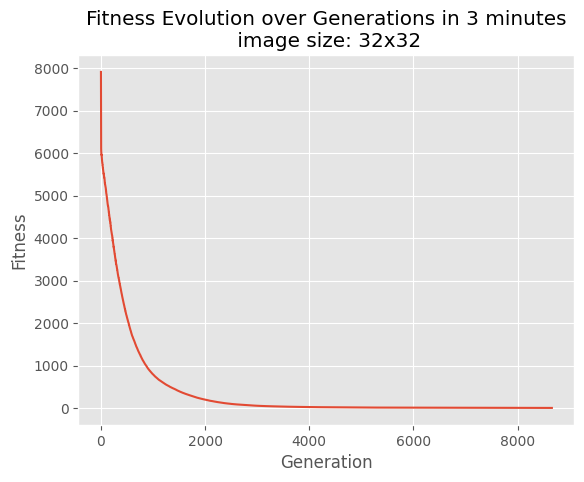

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(fitness_evolution_32)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title(f'Fitness Evolution over Generations in {((end_time - start_time)//60):.0f} minutes\n image size: 32x32')
plt.savefig('../evolution_32/fitness_evolution_32.png')
plt.show()

In [4]:


n = 32

np.save(f'../evolution_{n}/best_ind.npy', result_32)

# Source images folder
folder_path = f"../evolution_{n}/images_{n}"  

# Output GIF file
output_gif = f"../evolution_{n}/output.gif"

# Read all images in the folder
images = []
for file_name in sorted(os.listdir(folder_path)):
    if file_name.endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(folder_path, file_name)
        img = Image.open(img_path).convert("RGBA")
        images.append(img)

# Create GIF
if images:
    images[0].save(
        output_gif,
        save_all=True,
        append_images=images[1:],
        duration=200, # milliseconds per frame
        loop=0  # infinite loop
    )
    print(f"GIF creation done: {output_gif}")
else:
    print("No images found in the folder.")

GIF creation done: ../evolution_32/output.gif
